In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
from shared.user_groups import *

In [47]:
ug = UserGroups("user-groups.dev.yaml")

2025-02-03 11:10:33.769 | WARNING  | shared.user_groups:check_groups_consistency:121 - These groups are associated to DOMAINS but not defined in the GROUPS section, the domains settings may not work as expected: {'edmo', 'witness'}
2025-02-03 11:10:33.771 | WARNING  | shared.user_groups:check_groups_consistency:123 - These groups are associated to USERS but not defined in the GROUPS section, the users settings may not work as expected: {'witness'}


In [48]:
ug.groups.items()

dict_items([('bellingcat', GroupModel(description='Bellingcat staff', orchestrator='secrets/orchestration-bcat.yaml', orchestrator_sheet='secrets/orchestration-bcat-sheet.yaml', permissions=GroupPermissions(read={'all'}, archive_url=True, archive_sheet=True, sheet_frequency={'hourly', 'daily'}, max_sheets=-1, max_archive_lifespan_months=-1, max_monthly_urls=-1, max_monthly_mbs=-1, priority='high'))), ('janda', GroupModel(description='J&A team - Ukraine Project', orchestrator='secrets/orchestration-janda-ukr.yaml', orchestrator_sheet='secrets/orchestration-janda-ukr-sheet.yaml', permissions=GroupPermissions(read={'all'}, archive_url=True, archive_sheet=True, sheet_frequency={'hourly', 'daily'}, max_sheets=-1, max_archive_lifespan_months=-1, max_monthly_urls=-1, max_monthly_mbs=-1, priority='low'))), ('ukraine', GroupModel(description='Members working on the Ukraine Civharm/Witness projects', orchestrator='secrets/orchestration-default.yaml', orchestrator_sheet='secrets/orchestration-def

In [49]:
ug.groups["bellingcat"]

GroupModel(description='Bellingcat staff', orchestrator='secrets/orchestration-bcat.yaml', orchestrator_sheet='secrets/orchestration-bcat-sheet.yaml', permissions=GroupPermissions(read={'all'}, archive_url=True, archive_sheet=True, sheet_frequency={'hourly', 'daily'}, max_sheets=-1, max_archive_lifespan_months=-1, max_monthly_urls=-1, max_monthly_mbs=-1, priority='high'))

In [50]:
"bellingcat" in ug.groups

True

---

In [17]:
try:
	assert 123 == "as", "that was unexpected"
	raise ValueError("this is a test")
except Exception as e:
	print(type(e))
	print(e.__class__.__name__)
	print(e)

<class 'AssertionError'>
AssertionError
that was unexpected


---

In [1]:
def custom_hash(s: str) -> int:
    hash = 0
    for char in s:
        hash = (hash * 31 + ord(char)) & 0xFFFFFFFF  # 31 is a prime number, used in Java hash
    return hash % 60  # Ensure it fits within 60 minutes

In [18]:
def fnv1a_hash_mod(s: str, modulo:int) -> int:
    hash = 0x811c9dc5 # FNV offset basis
    fnv_prime = 0x01000193 # FNV prime
    for char in s:
        hash ^= ord(char)
        hash *= fnv_prime
        hash &= 0xFFFFFFFF # Keep it 32-bit
    return (hash if hash < 0x80000000 else hash - 0x100000000) % modulo

In [3]:
#generate random google sheet ids
import random
import string
def random_sheet_id():
    return ''.join(random.choices(string.ascii_uppercase + string.ascii_lowercase + string.digits, k=44))
random_sheet_id()

'N7wlA3HmjrDxENPpshxpkiTY6FVUB4OlKGgIMuui1M0p'

In [7]:
from tqdm import tqdm
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [19]:
modulo_counter = Counter()
for i in tqdm(range(1_000_000)):
	id = random_sheet_id()
	hash = fnv1a_hash_mod(id, 24)
	# hash = custom_hash(id)
	modulo_counter[hash] += 1
print(modulo_counter)
# custom: [00:16<00:00, 60651.26it/s]

100%|██████████| 1000000/1000000 [00:16<00:00, 60730.44it/s]

Counter({1: 42205, 2: 41980, 4: 41915, 7: 41851, 14: 41785, 12: 41781, 10: 41744, 23: 41734, 6: 41709, 5: 41707, 18: 41705, 8: 41697, 15: 41654, 16: 41651, 9: 41642, 11: 41562, 22: 41555, 21: 41533, 3: 41481, 13: 41461, 19: 41453, 20: 41453, 0: 41447, 17: 41295})


<BarContainer object of 24 artists>

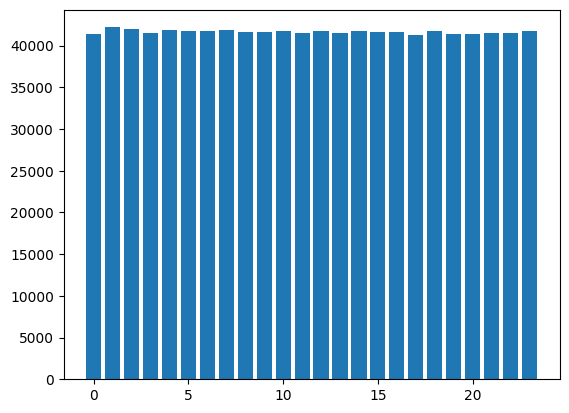

In [20]:
plt.bar(modulo_counter.keys(), modulo_counter.values())


<BarContainer object of 60 artists>

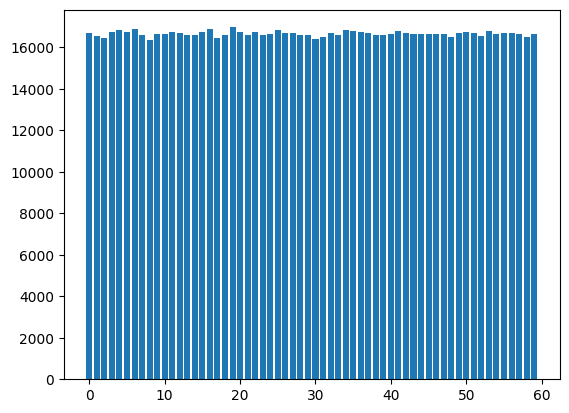

In [ ]:
plt.bar(modulo_counter.keys(), modulo_counter.values())
